In [3]:
from time import time
import numpy as np
from matplotlib import pyplot as plt
from sklearn import metrics
from sklearn.decomposition import PCA
import seaborn as sns
import skimage.io
from skimage.transform import rescale, resize
import pandas as pd
from skimage import exposure
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from sklearn import svm
import random
import pickle

The dataset has the following directory structure:

<pre>
<b>chest-xray-Project\Normal</b>
|__ <b>train</b>
    |______ <b>Parasitized</b>
            |____<b>1000 images</b>
    |______ <b>Uninfected</b>
            |____<b>1000 images</b>
|__ <b>validation</b>
    |______ <b>Parasitized</b>
            |___<b>500 images</b>
    |______ <b>Uninfected</b>
            |___<b>500 images</b>
</pre>

In [4]:
imgs=skimage.io.imread_collection("chest-xray-Project/Normal/*.jpeg")
imgs2=skimage.io.imread_collection("chest-xray-Project/Pneumonia/*.jpeg")

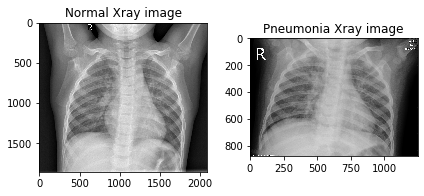

In [5]:
fig, axes = plt.subplots(nrows=1, ncols=2)
ax = axes.ravel()
ax[0].imshow(imgs[0], cmap='gray')
ax[0].set_title("Normal Xray image")

ax[1].imshow(imgs2[0], cmap='gray')
ax[1].set_title("Pneumonia Xray image")
plt.tight_layout()
plt.show()

D:\softwares\Anaconda\lib\site-packages\skimage\transform\_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


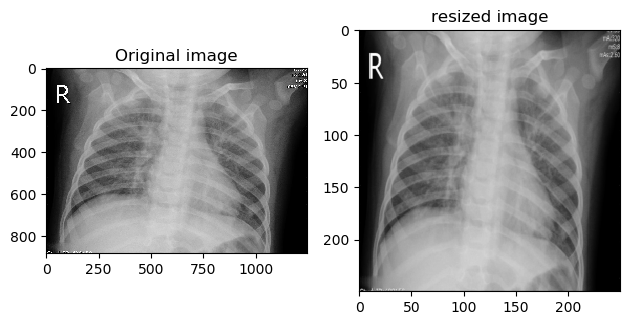

In [83]:
image_resized = resize(imgs[0], (250,250),
                       anti_aliasing=True)

fig, axes = plt.subplots(nrows=1, ncols=2)
ax = axes.ravel()
ax[0].imshow(imgs[0], cmap='gray')
ax[0].set_title("Original image")

ax[1].imshow(image_resized, cmap='gray')
ax[1].set_title("resized image")
plt.tight_layout()
plt.show()

D:\softwares\Anaconda\lib\site-packages\skimage\util\dtype.py:141: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))


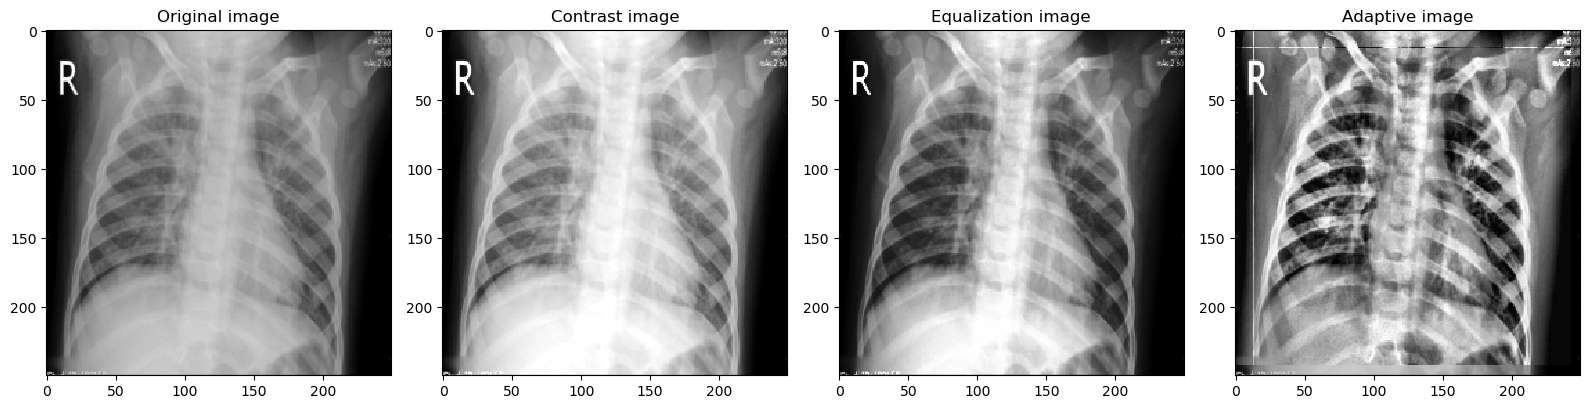

In [84]:
plt.rcParams['figure.figsize'] = (16,9)
# Contrast stretching
p2, p98 = np.percentile(image_resized, (2, 98))
pic1 = exposure.rescale_intensity(image_resized, in_range=(p2, p98))
# Equalization
img_eq = exposure.equalize_hist(image_resized)
# Adaptive Equalization
img_adapteq = exposure.equalize_adapthist(image_resized, clip_limit=0.03)
fig, axes = plt.subplots(nrows=1, ncols=4)
ax = axes.ravel()
ax[0].imshow(image_resized, cmap='gray')
ax[0].set_title("Original image")
ax[1].imshow(pic1, cmap='gray')
ax[1].set_title("Contrast image")
ax[2].imshow(img_eq, cmap='gray')
ax[2].set_title("Equalization image")
ax[3].imshow(img_adapteq, cmap='gray')
ax[3].set_title("Adaptive image")
plt.tight_layout()
plt.show()

In [78]:
from skimage import data, img_as_float
def plot_img_and_hist(image, axes, bins=256):
    """Plot an image along with its histogram and cumulative histogram.

    """
    image = img_as_float(image)
    ax_img, ax_hist = axes
    ax_cdf = ax_hist.twinx()

    # Display image
    ax_img.imshow(image, cmap=plt.cm.gray)
    ax_img.set_axis_off()

    # Display histogram
    ax_hist.hist(image.ravel(), bins=bins, histtype='step', color='black')
    ax_hist.ticklabel_format(axis='y', style='scientific', scilimits=(0, 0))
    ax_hist.set_xlabel('Pixel intensity')
    ax_hist.set_xlim(0, 1)
    ax_hist.set_yticks([])

    # Display cumulative distribution
    img_cdf, bins = exposure.cumulative_distribution(image, bins)
    ax_cdf.plot(bins, img_cdf, 'r')
    ax_cdf.set_yticks([])

    return ax_img, ax_hist, ax_cdf


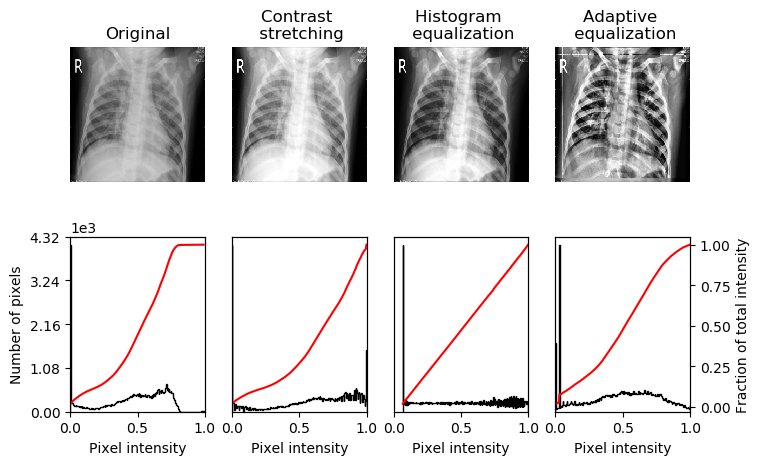

In [85]:
# Display results
fig = plt.figure(figsize=(8, 5))
axes = np.zeros((2, 4), dtype=np.object)
axes[0, 0] = fig.add_subplot(2, 4, 1)
for i in range(1, 4):
    axes[0, i] = fig.add_subplot(2, 4, 1+i, sharex=axes[0,0], sharey=axes[0,0])
for i in range(0, 4):
    axes[1, i] = fig.add_subplot(2, 4, 5+i)

ax_img, ax_hist, ax_cdf = plot_img_and_hist(image_resized, axes[:, 0])
ax_img.set_title('Original')

y_min, y_max = ax_hist.get_ylim()
ax_hist.set_ylabel('Number of pixels')
ax_hist.set_yticks(np.linspace(0, y_max, 5))

ax_img, ax_hist, ax_cdf = plot_img_and_hist(pic1, axes[:, 1])
ax_img.set_title('Contrast \n stretching')

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img_eq, axes[:, 2])
ax_img.set_title('Histogram \n equalization')

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img_adapteq, axes[:, 3])
ax_img.set_title('Adaptive \n equalization')

ax_cdf.set_ylabel('Fraction of total intensity')
ax_cdf.set_yticks(np.linspace(0, 1, 5))

# prevent overlap of y-axis labels
plt.show()

In [86]:
img_adapteq.shape

(250, 250)

In [87]:
img_adapteq.flatten().size

62500

In [88]:
img_adapteq.ravel().size

62500

In [89]:
img_adapteq.ravel()

array([0.065824  , 0.065824  , 0.06786914, ..., 0.065824  , 0.065824  ,
       0.065824  ])

In [135]:
arr1=img_adapteq.ravel()

In [117]:
arr2=img_img_adapteqeq.ravel()

In [121]:
ex=np.vstack((arr1,arr2))

In [131]:
data=pd.DataFrame(np.vstack((arr1,arrt)))
data.head(2)

,0,1,2,3,4,5,6,7,8,9,...,62490,62491,62492,62493,62494,62495,62496,62497,62498,62499
0,0.108344,0.108344,0.079534,0.079534,0.052066,0.052066,0.308613,0.342916,0.366233,0.379967,...,0.36782,0.370994,0.370994,0.375938,0.379112,0.379967,0.379967,0.38369,0.387231,0.336813
1,0.108344,0.108344,0.079534,0.079534,0.052066,0.052066,0.308613,0.342916,0.366233,0.379967,...,0.36782,0.370994,0.370994,0.375938,0.379112,0.379967,0.379967,0.38369,0.387231,0.336813


In [158]:
image_resized = resize(imgs[0], (250,250),
                       anti_aliasing=True)
img_adapteq = exposure.equalize_adapthist(image_resized, clip_limit=0.03)
arr1=img_adapteq.ravel()
arr1

D:\softwares\Anaconda\lib\site-packages\skimage\transform\_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
D:\softwares\Anaconda\lib\site-packages\skimage\util\dtype.py:141: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))


array([0.10834402, 0.10834402, 0.07953366, ..., 0.38369041, 0.38723067,
       0.33681255])

In [159]:
for i in range(1,25):
    image_resized = resize(imgs[i], (250,250),
                       anti_aliasing=True)
    # Adaptive Equalization
    img_adapteq = exposure.equalize_adapthist(image_resized, clip_limit=0.03)
    arr2=img_adapteq.ravel()
    arr1=np.vstack((arr1,arr2))


D:\softwares\Anaconda\lib\site-packages\skimage\transform\_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
D:\softwares\Anaconda\lib\site-packages\skimage\util\dtype.py:141: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))
D:\softwares\Anaconda\lib\site-packages\skimage\transform\_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
D:\softwares\Anaconda\lib\site-packages\skimage\util\dtype.py:141: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))
D:\softwares\Anaconda\lib\site-packages\skimage\transform\_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("

D:\softwares\Anaconda\lib\site-packages\skimage\util\dtype.py:141: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))
D:\softwares\Anaconda\lib\site-packages\skimage\transform\_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
D:\softwares\Anaconda\lib\site-packages\skimage\util\dtype.py:141: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))
D:\softwares\Anaconda\lib\site-packages\skimage\transform\_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
D:\softwares\Anaconda\lib\site-packages\skimage\util\dtype.py:141: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtyp

In [160]:
arr1.shape

(25, 62500)

In [162]:
pd.DataFrame(arr1).to_csv("NormalXray.csv")

In [151]:
arr1

array([[0.10834402, 0.10834402, 0.07953366, ..., 0.38369041, 0.38723067,
        0.33681255],
       [0.10834402, 0.10834402, 0.07953366, ..., 0.38369041, 0.38723067,
        0.33681255],
       [0.03015321, 0.06579991, 0.09601416, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.0095831 , 0.05072331, 0.14673747, ..., 0.32344503, 0.22633217,
        0.20844778],
       [0.01367271, 0.01367271, 0.01367271, ..., 0.        , 0.        ,
        0.        ],
       [0.09876091, 0.15632058, 0.18653482, ..., 0.02459867, 0.02044803,
        0.02099738]])

In [163]:
imgs2=skimage.io.imread_collection("chest-xray-Project/Pneumonia/*.jpeg")

In [164]:
image_resized = resize(imgs2[0], (250,250),
                       anti_aliasing=True)
    # Adaptive Equalization
img_adapteq = exposure.equalize_adapthist(image_resized, clip_limit=0.03)
arrt=img_adapteq.ravel()
arrt

D:\softwares\Anaconda\lib\site-packages\skimage\transform\_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
D:\softwares\Anaconda\lib\site-packages\skimage\util\dtype.py:141: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))


array([0.02874931, 0.02874931, 0.02874931, ..., 0.        , 0.        ,
       0.        ])

In [165]:
for i in range(29):
    image_resized = resize(imgs2[i], (250,250),
                       anti_aliasing=True)
    # Adaptive Equalization
    img_adapteq = exposure.equalize_adapthist(image_resized, clip_limit=0.03)
    arr3=img_adapteq.ravel()
    arrt=np.vstack((arrt,arr3))

D:\softwares\Anaconda\lib\site-packages\skimage\transform\_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
D:\softwares\Anaconda\lib\site-packages\skimage\util\dtype.py:141: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))
D:\softwares\Anaconda\lib\site-packages\skimage\transform\_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
D:\softwares\Anaconda\lib\site-packages\skimage\util\dtype.py:141: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))
D:\softwares\Anaconda\lib\site-packages\skimage\transform\_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("

D:\softwares\Anaconda\lib\site-packages\skimage\util\dtype.py:141: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))
D:\softwares\Anaconda\lib\site-packages\skimage\transform\_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
D:\softwares\Anaconda\lib\site-packages\skimage\util\dtype.py:141: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))
D:\softwares\Anaconda\lib\site-packages\skimage\transform\_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
D:\softwares\Anaconda\lib\site-packages\skimage\util\dtype.py:141: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtyp

In [168]:
pd.DataFrame(arrt).to_csv("PneumoniaXray.csv")

In [171]:
data=pd.DataFrame(np.vstack((arr1,arrt)))

In [173]:

for i in range(52):
    pca = PCA(n_components=i)
    pca.fit(data)
    print (i,pca.explained_variance_ratio_.sum())

0 0.0
1 0.09930464614422468
2 0.1530259777760437
3 0.20477862576245864
4 0.24889379730854744
5 0.288574744153838
6 0.32128507539055956
7 0.3523355883020008
8 0.37967046991317444
9 0.40611557870474185
10 0.4311258677808653
11 0.45526544301852845
12 0.4782475101208301
13 0.5002353254030995
14 0.5220585524673607
15 0.5419049070920535
16 0.5614437094949809
17 0.5803364509712867
18 0.5992209459271655
19 0.6173824536328323
20 0.6341854915647991
21 0.651474943844006
22 0.6675651019426645
23 0.6832039142507847
24 0.6983685487404561
25 0.713113135261842
26 0.7280278551749026
27 0.741204408793636
28 0.7558351197734829
29 0.7692034400296376
30 0.7820083640802169
31 0.7939735963211297
32 0.8058915809351999
33 0.8177030072576519
34 0.8294481159011292
35 0.8410310848258247
36 0.8512587248533557
37 0.862166070064735
38 0.8736905237352368
39 0.8836566178563844
40 0.893345779996965
41 0.902989956758859
42 0.9128080345776051
43 0.9218697503592854
44 0.9307936465418443
45 0.9394136806475019
46 0.94785655

ValueError: n_components=56 must be between 0 and min(n_samples, n_features)=55 with svd_solver='full'

In [174]:
pca = PCA(n_components=29)
pca.fit(data)

PCA(copy=True, iterated_power='auto', n_components=29, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [176]:
existing_2d = pca.transform(data)
existing_df_2d = pd.DataFrame(existing_2d)
existing_df_2d.head()

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
0,-4.376410,-0.307448,16.987756,-17.720799,10.894215,1.538147,-5.962239,-13.285103,5.285634,3.071883,...,-8.036150,-1.271624,-3.119868,-5.099877,-15.203176,-1.209128,-12.074186,-2.346665,-0.724259,0.431441
1,-9.851159,13.655744,-5.640944,0.206713,-5.233837,-9.853300,2.961727,-6.636785,-11.098674,8.553159,...,-6.280867,-4.124956,0.304885,-0.308340,4.486024,-3.326474,-5.137371,-4.410998,5.201771,-3.953996
2,-28.327578,-4.475830,1.905261,-8.847914,0.213507,11.739764,4.555577,-6.555822,9.214549,5.534222,...,15.999237,4.222030,-1.280850,-8.256420,1.382633,0.464706,6.224798,-1.579035,2.709269,-8.944333
3,-7.597943,1.493042,7.577818,-4.335903,1.113453,4.728073,8.990788,-13.641924,-0.888676,-0.892554,...,-4.671292,-0.738754,-5.905048,2.105506,1.361419,-4.470977,1.156634,12.673905,-3.030331,1.171083
4,-20.719434,6.927111,9.998755,10.197293,-14.792913,-6.741609,-2.863926,5.891147,-11.020804,2.204706,...,-3.738111,-1.921217,2.389178,1.618817,11.804820,-1.047968,0.208842,-0.972234,2.693345,3.425651


In [178]:
existing_df_2d.to_csv("Final.csv")

D:\softwares\Anaconda\lib\site-packages\yellowbrick\utils\kneed.py:140: YellowbrickWarning: No 'knee' or 'elbow point' detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
D:\softwares\Anaconda\lib\site-packages\yellowbrick\cluster\elbow.py:343: YellowbrickWarning: No 'knee' or 'elbow' point detected, pass `locate_elbow=False` to remove the warning
  warnings.warn(warning_message, YellowbrickWarning)


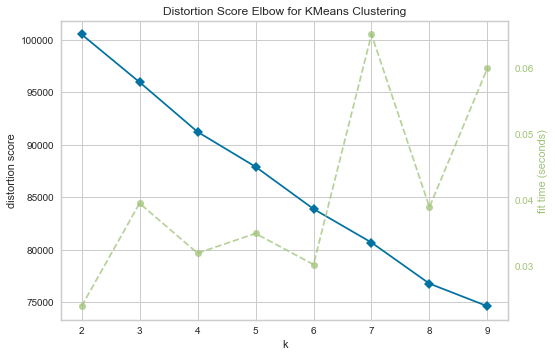

KElbowVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x0000021F55411358>,
         k=None, locate_elbow=True, metric='distortion', model=None,
         timings=True)

In [179]:
from sklearn.cluster import KMeans
from yellowbrick.cluster.elbow import kelbow_visualizer
from yellowbrick.datasets.loaders import load_nfl

# Use the quick method and immediately show the figure
kelbow_visualizer(KMeans(random_state=4), existing_df_2d, k=(2,10))

In [183]:
# Using the KMeans from sklearn
kmeans = KMeans(n_clusters=2)
kmeans.fit(existing_df_2d)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [184]:
kmeans.cluster_centers_

array([[-13.35937152,   1.72302244,  -0.24767855,   1.89164907,
         -0.88870968,   0.70340526,  -0.04754013,  -0.49333006,
          0.09721476,  -1.88295379,   0.16595179,   0.31659792,
          0.53191301,   1.14372363,  -0.06275946,   0.11561861,
         -0.43862949,   0.03320853,  -0.03381129,   0.20778987,
         -0.43571837,   0.22543995,   0.35107015,  -1.0413495 ,
          0.16630417,  -0.08261815,   0.39524561,  -0.14593293,
         -0.12951805],
       [ 13.85416306,  -1.78683808,   0.25685183,  -1.96171015,
          0.92162486,  -0.72945731,   0.04930088,   0.51160154,
         -0.10081531,   1.95269282,  -0.17209815,  -0.32832377,
         -0.5516135 ,  -1.18608377,   0.06508388,  -0.11990078,
          0.45487502,  -0.03443847,   0.03506356,  -0.21548579,
          0.45185609,  -0.23378958,  -0.36407274,   1.079918  ,
         -0.17246359,   0.08567808,  -0.40988434,   0.15133785,
          0.13431502]])

In [185]:
final =existing_df_2d
final['Actual Label']=kmeans.labels_

In [190]:
final.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,cluster
0,-4.376410,-0.307448,16.987756,-17.720799,10.894215,1.538147,-5.962239,-13.285103,5.285634,3.071883,...,-1.271624,-3.119868,-5.099877,-15.203176,-1.209128,-12.074186,-2.346665,-0.724259,0.431441,0
1,-9.851159,13.655744,-5.640944,0.206713,-5.233837,-9.853300,2.961727,-6.636785,-11.098674,8.553159,...,-4.124956,0.304885,-0.308340,4.486024,-3.326474,-5.137371,-4.410998,5.201771,-3.953996,0
2,-28.327578,-4.475830,1.905261,-8.847914,0.213507,11.739764,4.555577,-6.555822,9.214549,5.534222,...,4.222030,-1.280850,-8.256420,1.382633,0.464706,6.224798,-1.579035,2.709269,-8.944333,0
3,-7.597943,1.493042,7.577818,-4.335903,1.113453,4.728073,8.990788,-13.641924,-0.888676,-0.892554,...,-0.738754,-5.905048,2.105506,1.361419,-4.470977,1.156634,12.673905,-3.030331,1.171083,0
4,-20.719434,6.927111,9.998755,10.197293,-14.792913,-6.741609,-2.863926,5.891147,-11.020804,2.204706,...,-1.921217,2.389178,1.618817,11.804820,-1.047968,0.208842,-0.972234,2.693345,3.425651,0


In [193]:
40/55

0.7272727272727273

In [194]:

pickle_out = open("dict.pickle","wb")
pickle.dump(pca, pickle_out)
pickle_out.close()

In [195]:
pickle_in = open("dict.pickle","rb")
example_dict = pickle.load(pickle_in)
print(example_dict)

PCA(copy=True, iterated_power='auto', n_components=29, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)


In [2]:
import pandas as pd
zz=pd.read_csv('Final2.csv')

In [3]:
zz.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,21,22,23,24,25,26,27,28,Actual Label,ImagesNames
0,0,-4.376410,-0.307448,16.987756,-17.720799,10.894215,1.538147,-5.962239,-13.285103,5.285634,...,-3.119868,-5.099877,-15.203176,-1.209128,-12.074186,-2.346665,-0.724259,0.431441,Normal,IM-0156-0001.jpeg
1,1,-9.851159,13.655744,-5.640944,0.206713,-5.233837,-9.853300,2.961727,-6.636785,-11.098674,...,0.304885,-0.308340,4.486024,-3.326474,-5.137371,-4.410998,5.201771,-3.953996,Normal,IM-0158-0001.jpeg
2,2,-28.327578,-4.475830,1.905261,-8.847914,0.213507,11.739764,4.555577,-6.555822,9.214549,...,-1.280850,-8.256420,1.382633,0.464706,6.224798,-1.579035,2.709269,-8.944333,Normal,IM-0160-0001.jpeg
3,3,-7.597943,1.493042,7.577818,-4.335903,1.113453,4.728073,8.990788,-13.641924,-0.888676,...,-5.905048,2.105506,1.361419,-4.470977,1.156634,12.673905,-3.030331,1.171083,Normal,IM-0162-0001.jpeg
4,4,-20.719434,6.927111,9.998755,10.197293,-14.792913,-6.741609,-2.863926,5.891147,-11.020804,...,2.389178,1.618817,11.804820,-1.047968,0.208842,-0.972234,2.693345,3.425651,Normal,IM-0115-0001.jpeg


In [4]:
zz=zz.drop(columns='Unnamed: 0')

In [205]:
zz['kmeans']=kmeans.labels_
zz.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,Actual Label,ImagesNames,kmeans
0,-4.376410,-0.307448,16.987756,-17.720799,10.894215,1.538147,-5.962239,-13.285103,5.285634,3.071883,...,-5.099877,-15.203176,-1.209128,-12.074186,-2.346665,-0.724259,0.431441,Normal,IM-0156-0001.jpeg,0
1,-9.851159,13.655744,-5.640944,0.206713,-5.233837,-9.853300,2.961727,-6.636785,-11.098674,8.553159,...,-0.308340,4.486024,-3.326474,-5.137371,-4.410998,5.201771,-3.953996,Normal,IM-0158-0001.jpeg,0
2,-28.327578,-4.475830,1.905261,-8.847914,0.213507,11.739764,4.555577,-6.555822,9.214549,5.534222,...,-8.256420,1.382633,0.464706,6.224798,-1.579035,2.709269,-8.944333,Normal,IM-0160-0001.jpeg,0
3,-7.597943,1.493042,7.577818,-4.335903,1.113453,4.728073,8.990788,-13.641924,-0.888676,-0.892554,...,2.105506,1.361419,-4.470977,1.156634,12.673905,-3.030331,1.171083,Normal,IM-0162-0001.jpeg,0
4,-20.719434,6.927111,9.998755,10.197293,-14.792913,-6.741609,-2.863926,5.891147,-11.020804,2.204706,...,1.618817,11.804820,-1.047968,0.208842,-0.972234,2.693345,3.425651,Normal,IM-0115-0001.jpeg,0


In [208]:
zz=final
zz.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,Actual Label,ImagesNames,kmeans
0,-4.376410,-0.307448,16.987756,-17.720799,10.894215,1.538147,-5.962239,-13.285103,5.285634,3.071883,...,-5.099877,-15.203176,-1.209128,-12.074186,-2.346665,-0.724259,0.431441,0,IM-0156-0001.jpeg,0
1,-9.851159,13.655744,-5.640944,0.206713,-5.233837,-9.853300,2.961727,-6.636785,-11.098674,8.553159,...,-0.308340,4.486024,-3.326474,-5.137371,-4.410998,5.201771,-3.953996,0,IM-0158-0001.jpeg,0
2,-28.327578,-4.475830,1.905261,-8.847914,0.213507,11.739764,4.555577,-6.555822,9.214549,5.534222,...,-8.256420,1.382633,0.464706,6.224798,-1.579035,2.709269,-8.944333,0,IM-0160-0001.jpeg,0
3,-7.597943,1.493042,7.577818,-4.335903,1.113453,4.728073,8.990788,-13.641924,-0.888676,-0.892554,...,2.105506,1.361419,-4.470977,1.156634,12.673905,-3.030331,1.171083,0,IM-0162-0001.jpeg,0
4,-20.719434,6.927111,9.998755,10.197293,-14.792913,-6.741609,-2.863926,5.891147,-11.020804,2.204706,...,1.618817,11.804820,-1.047968,0.208842,-0.972234,2.693345,3.425651,0,IM-0115-0001.jpeg,0


In [209]:
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import metrics

In [216]:
tdata=zz.iloc[:,:30]
tdata.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,Actual Label
0,-4.376410,-0.307448,16.987756,-17.720799,10.894215,1.538147,-5.962239,-13.285103,5.285634,3.071883,...,-1.271624,-3.119868,-5.099877,-15.203176,-1.209128,-12.074186,-2.346665,-0.724259,0.431441,0
1,-9.851159,13.655744,-5.640944,0.206713,-5.233837,-9.853300,2.961727,-6.636785,-11.098674,8.553159,...,-4.124956,0.304885,-0.308340,4.486024,-3.326474,-5.137371,-4.410998,5.201771,-3.953996,0
2,-28.327578,-4.475830,1.905261,-8.847914,0.213507,11.739764,4.555577,-6.555822,9.214549,5.534222,...,4.222030,-1.280850,-8.256420,1.382633,0.464706,6.224798,-1.579035,2.709269,-8.944333,0
3,-7.597943,1.493042,7.577818,-4.335903,1.113453,4.728073,8.990788,-13.641924,-0.888676,-0.892554,...,-0.738754,-5.905048,2.105506,1.361419,-4.470977,1.156634,12.673905,-3.030331,1.171083,0
4,-20.719434,6.927111,9.998755,10.197293,-14.792913,-6.741609,-2.863926,5.891147,-11.020804,2.204706,...,-1.921217,2.389178,1.618817,11.804820,-1.047968,0.208842,-0.972234,2.693345,3.425651,0


In [215]:
ydata =zz.loc[:,'Actual Label']
ydata.head()

0    0
1    0
2    0
3    0
4    0
Name: Actual Label, dtype: int64

In [217]:
train,test=train_test_split(tdata,test_size=0.3,random_state=4)
print(train.shape)
print(test.shape)

(38, 30)
(17, 30)


In [218]:
train_x=train.iloc[:,:29]
train_y=train.iloc[:,29]
test_x=test.iloc[:,:29]
test_y=test.iloc[:,29]

In [220]:
model=svm.SVC(kernel='linear')
model.fit(train_x,train_y)
predicted=model.predict(test_x)
print(metrics.accuracy_score(test_y,predicted))

0.8823529411764706


In [60]:
import random
import matplotlib.pyplot as plt
import cv2
import numpy as np

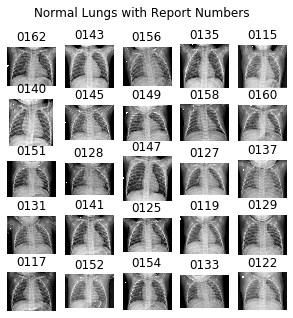

In [62]:
total_normal_images=list(zz[zz['Actual Label']==0]['ImagesNames'])
numberofReports =25
sample_normal = random.sample(total_normal_images,numberofReports)
f,ax = plt.subplots(5,5,figsize=(5,5))

for i in range(0,numberofReports):
    im = cv2.imread('chest-xray-Project/Normal/'+sample_normal[i])
    ax[i//5,i%5].imshow(im)
    ax[i//5,i%5].axis('off')
    ax[i//5,i%5].set_title(sample_normal[i][3:7])
f.suptitle('Normal Lungs with Report Numbers')
plt.show()

In [45]:
total_normal_images[0]

'IM-0156-0001.jpeg'

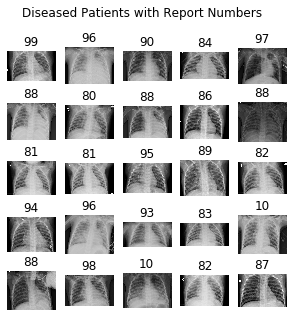

In [57]:
total_normal_images=list(zz[zz['Actual Label']==1]['ImagesNames'])
sample_normal = random.sample(total_normal_images,25)
f,ax = plt.subplots(5,5,figsize=(5,5))

for i in range(0,25):
    im = cv2.imread('chest-xray-Project/Pneumonia/'+sample_normal[i])
    ax[i//5,i%5].imshow(im)
    ax[i//5,i%5].axis('off')
    ax[i//5,i%5].set_title(sample_normal[i][6:8])
f.suptitle('Diseased Patients with Report Numbers')
plt.show()

In [55]:
total_normal_images[1]

'person96_virus_178.jpeg'